In [1]:
%matplotlib inline


# Finding Local Peaks in Solar Data


Detección de picos de intensidades en imágenes solares.



In [2]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from skimage.feature import peak_local_max

import sunpy.map
from sunpy.data.sample import AIA_193_IMAGE

Se usará un sample de sunpy


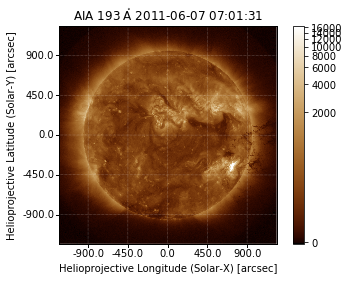

In [3]:
aiamap = sunpy.map.Map('/home/yasser/Documents/DatosJupyterSun/JSOC_AIA_FITS/aia.lev1_euv_12s.2011-06-07T070133Z.193.image_lev1.fits')
plt.figure()
aiamap.plot()
plt.colorbar()

In [13]:
x = np.arange(aiamap.data.shape[0])
y = np.arange(aiamap.data.shape[1])
X, Y = np.meshgrid(x[0:3000], y[0:3000])

print (X)
print (Y)

print x
print y

[[   0    1    2 ... 2997 2998 2999]
 [   0    1    2 ... 2997 2998 2999]
 [   0    1    2 ... 2997 2998 2999]
 ...
 [   0    1    2 ... 2997 2998 2999]
 [   0    1    2 ... 2997 2998 2999]
 [   0    1    2 ... 2997 2998 2999]]
[[   0    0    0 ...    0    0    0]
 [   1    1    1 ...    1    1    1]
 [   2    2    2 ...    2    2    2]
 ...
 [2997 2997 2997 ... 2997 2997 2997]
 [2998 2998 2998 ... 2998 2998 2998]
 [2999 2999 2999 ... 2999 2999 2999]]
[   0    1    2 ... 4093 4094 4095]
[   0    1    2 ... 4093 4094 4095]


La variable coordinates contendrá las coordenas en la imagen de los picos que cumplan el umbral (threshold_rel * maxIntensidad). Se puede definir la distancia mínima, en pixeles, para separar un pico de intensidad con otro.



In [14]:
coordinates = peak_local_max(aiamap.data, min_distance=200, threshold_rel=0.2)

Se plotea en 3D la imagen.



[ 6364  6364  9462  7587  6014  4778 16352]
[[2526 3361]
 [2525 3361]
 [2517 2949]
 [2365  493]
 [2330 1846]
 [2295 2360]
 [1482 3256]]
14


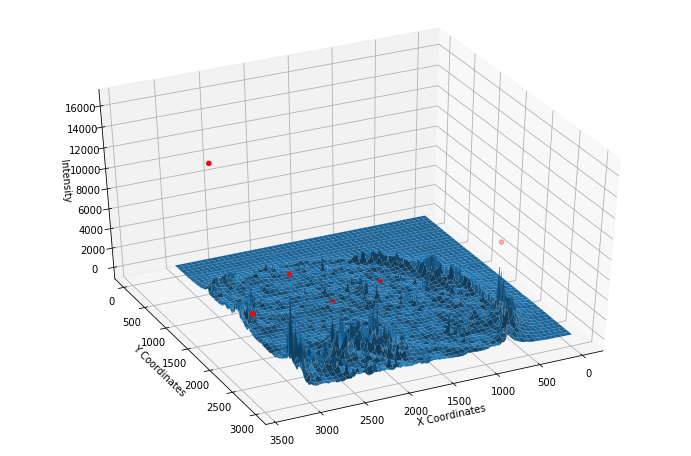

In [15]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, aiamap.data[0:3000, 0:3000])
ax.view_init(elev=39, azim=64)
peaks_pos = aiamap.data[coordinates[:, 0], coordinates[:, 1]]
print peaks_pos
print coordinates
ax.scatter(coordinates[:, 1], coordinates[:, 0], peaks_pos, color='r')
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Intensity')

print (aiamap.data[365, 808])

In [7]:
hpc_max = aiamap.pixel_to_world(coordinates[:, 1]*u.pixel, coordinates[:, 0]*u.pixel)

Se marca con una equis azul los puntos de alta intensidad.



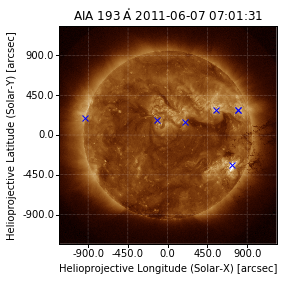

In [8]:
fig = plt.figure()
ax = plt.subplot(projection=aiamap)
aiamap.plot()
ax.plot_coord(hpc_max, 'bx')
plt.show()